#### Импорт необходимых библиотек

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1. Описание набора данных

### 2.1.1. Источник и методология сбора данных

Данные взяты из источника https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data 

Набор данных является полностью синтетическим. Он не содержит никакой реальной информации о пациентах и не нарушает никаких правил конфиденциальности.

### 2.1.2. Структура и содержание данных

#### Загрузка датасета и вывод первых 5 строчек для просмотра

In [62]:
data = pd.read_csv("healthcare_dataset.csv")
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


#### Размеры датасета

In [63]:
print("Количество строк:", data.shape[0])
print("Количество столбцов:", data.shape[1])

Количество строк: 55500
Количество столбцов: 15


#### Информация о столбцах набора данных: название столбца, количество значений, тип данных и общее использование памяти

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## 2.3. Предобработка данных

### 2.3.1. Очистка данных от пропусков, дубликатов, аномалий.

#### Вывод уникальных и пропущенных значений в данных

In [65]:
pd.DataFrame({'Уникальные':data.nunique(), 'Пропуски':data.isna().sum()})

,Уникальные,Пропуски
Name,49992,0
Age,77,0
Gender,2,0
Blood Type,8,0
Medical Condition,6,0
Date of Admission,1827,0
Doctor,40341,0
Hospital,39876,0
Insurance Provider,5,0
Billing Amount,50000,0


Очевидно, очистка пропусков не требуется.

#### Просмотр всех дубликатов и их количества, удаление дубликатов, оставляя первое вхождение. Вывод размеров датафрейма без дубликатов.

In [66]:
data[data.duplicated(keep = False)]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
64,Nancy glOVeR,58,Male,A-,Hypertension,2020-05-08,Jennifer Larson,"Khan, and Rodriguez Fischer",Medicare,19183.168885,378,Emergency,2020-06-01,Aspirin,Abnormal
107,DAVid higgInS,49,Female,B-,Arthritis,2021-03-05,Erin Henderson MD,"Evans and Hall Schneider,",Medicare,24948.477824,361,Emergency,2021-03-20,Penicillin,Abnormal
148,RoBErt hIGGInS,42,Male,AB-,Asthma,2021-05-06,Scott Davis,"and Ford Lee, Rodriguez",Medicare,13355.782085,451,Elective,2021-05-29,Ibuprofen,Inconclusive
154,kevIn HiCKs,66,Male,AB+,Arthritis,2021-06-23,Kelly Murphy,Robinson Inc,Medicare,1897.891727,196,Elective,2021-07-09,Ibuprofen,Abnormal
159,miCHAeL TayloR,29,Male,O-,Asthma,2020-02-27,Erica Mccormick,Donaldson-Frey,Medicare,41939.119937,453,Elective,2020-03-26,Ibuprofen,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [67]:
data.duplicated().sum()

534

In [68]:
data.drop_duplicates(keep='first', inplace=True)

In [69]:
data.duplicated().sum()

0

In [70]:
print("Количество строк без дубликатов:", data.shape[0])
print("Количество столбцов:", data.shape[1])

Количество строк без дубликатов: 54966
Количество столбцов: 15


#### Анализ данных на предмет выбросов.

In [72]:
data.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


Видим, что в датасете есть отрицательные значения суммы счета, такого быть не может, поэтому оставляем только неотрицательные.

In [73]:
data = data[data['Billing Amount'] >= 0]

In [74]:
print("Количество строк после удаления отрицательных значений:", data.shape[0])
print("Количество столбцов:", data.shape[1])

Количество строк после удаления отрицательных значений: 54860
Количество столбцов: 15


### 2.2.2. Преобразование данных (приведение к нужному типу данных)

In [56]:
data.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [57]:
data['Name'] = data['Name'].str.title()
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### 2.3.3 Описание наблюдений.

In [58]:
data.describe(datetime_is_numeric=True)

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54860.000000,54860,54860.000000,54860.000000,54860
mean,51.533850,2021-11-01 19:01:50.506744576,25594.633637,301.109752,2021-11-17 07:00:08.137076224
min,13.000000,2019-05-08 00:00:00,9.238787,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13299.747940,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25593.873000,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37847.066671,400.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605295,NaN,14175.867041,115.217195,NaN


In [59]:
data.describe(include= "object").T

,count,unique,top,freq
Name,54860,40167,Michael Williams,24
Gender,54860,2,Male,27449
Blood Type,54860,8,A-,6882
Medical Condition,54860,6,Arthritis,9207
Doctor,54860,40276,Michael Smith,27
Hospital,54860,39815,LLC Smith,44
Insurance Provider,54860,5,Cigna,11115
Admission Type,54860,3,Elective,18437
Medication,54860,5,Lipitor,11018
Test Results,54860,3,Abnormal,18399





1. Среди пациентов одинаковое количество мужчин и женщин.


2. Возраст пациентов варьируется от 13 до 89 лет, средний возраст составляет 52 года.


3. Чаще остальных у пациентов встречается диагноз Arthritis (Артрит).


4. Данные охватывают временнной период с 8 мая 2019 года по 7 мая 2024 года и дают полное представление о поступлении пациентов за пять лет.


5. Типы госпитализации:

Emergency (Экстренно)

Elective (Планово)

Urgent (Неотложно)



6. У пациентов обнаруживается 8 различных типов группы крови, наиболее распространенной из которых является A-.


7. Набор данных включает данные о поступлениях из 44 больниц, наиболее частой из которых является LLC Smith.


8. Среди 27 зарегистрированных врачей Michael Smith обслуживает наибольшее число пациентов.

## 2.4. Программная реализация различных методов визуализации данных.

### 2.4.1. Визуализация количества пациентов в зависимости от возраста и пола.


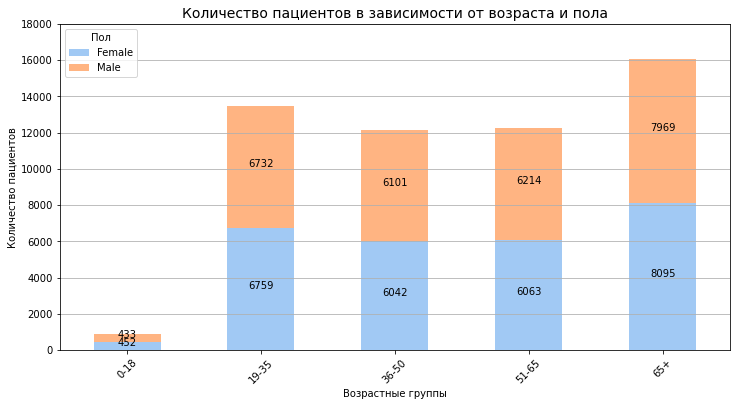

In [18]:
# Определение возрастных групп
bins = [0, 18, 35, 50, 65, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']
sns.set_palette("pastel")
# Группировка данных по возрастным категориям и полу
age_gender_counts = data.groupby([pd.cut(data['Age'], bins=bins, labels=age_labels), 'Gender']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
age_gender_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Количество пациентов в зависимости от возраста и пола', fontsize=14)
plt.xlabel('Возрастные группы')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.ylim(0, 18000)
plt.grid(axis='y')

# Добавление меток
for i in range(age_gender_counts.shape[0]):
    for j in range(age_gender_counts.shape[1]):
        plt.text(i, age_gender_counts.iloc[i].cumsum()[j] - age_gender_counts.iloc[i][j]/2,
                 str(int(age_gender_counts.iloc[i][j])), ha='center')
plt.show()

### 2.4.2. Визуализация распределения заболеваний по полу.

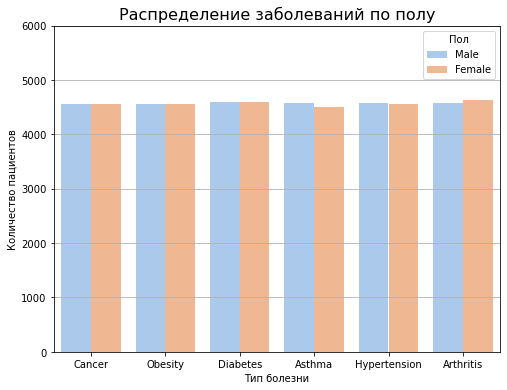

In [20]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.countplot(data=data, x='Medical Condition', hue='Gender')
plt.title('Распределение заболеваний по полу', fontsize=16)
plt.xlabel('Тип болезни')
plt.ylabel('Количество пациентов')
plt.legend(title='Пол')
plt.ylim(0, 6000)
plt.grid(axis='y')
plt.show()

### 2.4.3. Визуализация распределения заболеваний по группам крови

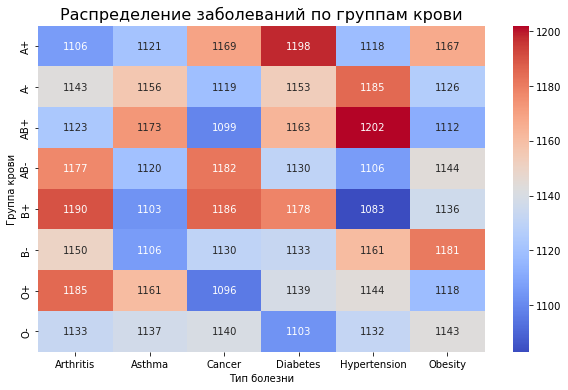

In [22]:
pivot_table = data.pivot_table(index='Blood Type', columns='Medical Condition', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Распределение заболеваний по группам крови', fontsize=16)
plt.xlabel('Тип болезни')
plt.ylabel('Группа крови')
plt.show()

### 2.4.4. Визуализация частоты заболеваемости по типу болезни.

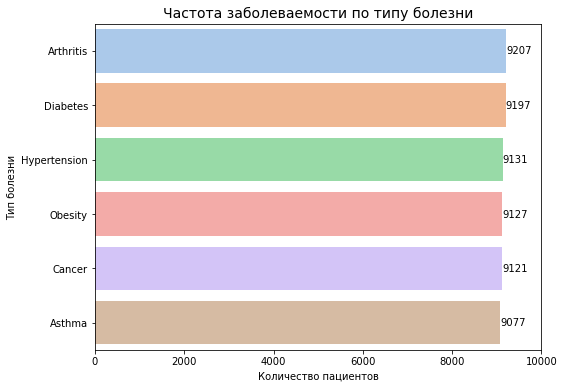

In [23]:
condition_counts = data['Medical Condition'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=condition_counts.values, y=condition_counts.index, palette='pastel')

plt.title('Частота заболеваемости по типу болезни', fontsize=14)
plt.xlabel('Количество пациентов')
plt.ylabel('Тип болезни')
plt.xlim(0, 10000)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')

plt.show()

### 2.4.5. Визуализация количества лечащих врачей по заболеваниям

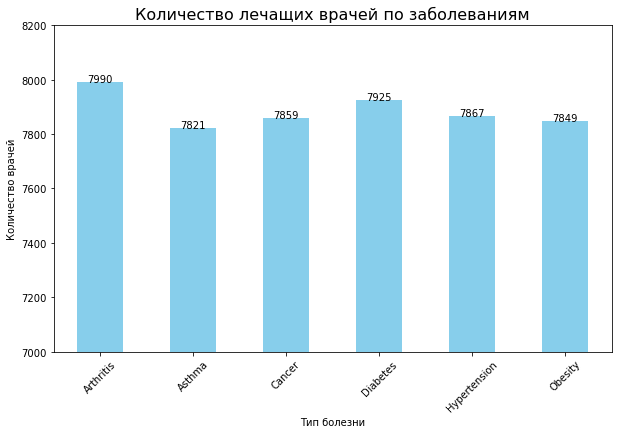

In [24]:
doctor_counts = data.groupby('Medical Condition')['Doctor'].nunique()
plt.figure(figsize=(10, 6))
doctor_counts.plot(kind='bar', color='skyblue')
plt.title('Количество лечащих врачей по заболеваниям', fontsize=16)
plt.xlabel('Тип болезни')
plt.ylabel('Количество врачей')
plt.xticks(rotation=45)
plt.ylim(7000, 8200)
for index, value in enumerate(doctor_counts):
    plt.text(index, value, str(value), ha='center') 
plt.show()

### 2.4.6. Визуализация распределения возрастных групп по типу болезни.

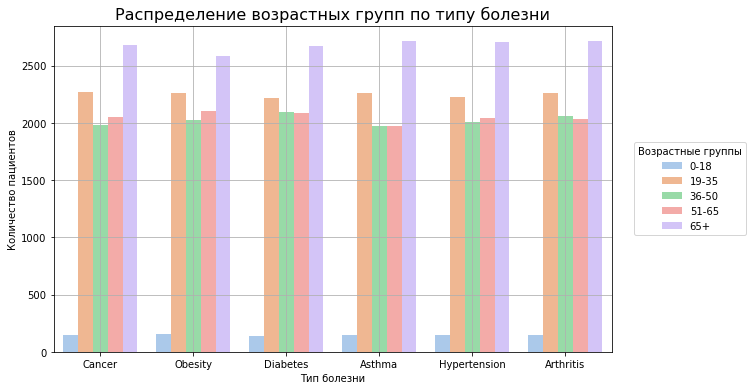

In [25]:
plt.figure(figsize=(10, 6))

sns.countplot(data=data, 
              x='Medical Condition', 
              hue=pd.cut(data['Age'], 
              bins=[0, 18, 35, 50, 65, float('inf')], 
              labels=['0-18', '19-35', '36-50', '51-65', '65+']), palette='pastel')

plt.title('Распределение возрастных групп по типу болезни', fontsize=16)
plt.xlabel('Тип болезни')
plt.ylabel('Количество пациентов')
plt.grid(True)

plt.legend(title='Возрастные группы', loc='right', bbox_to_anchor=(1.25, 0.5))
plt.show()

### 2.4.7. Визуализация влияния возраста и пола на распространенность заболеваний

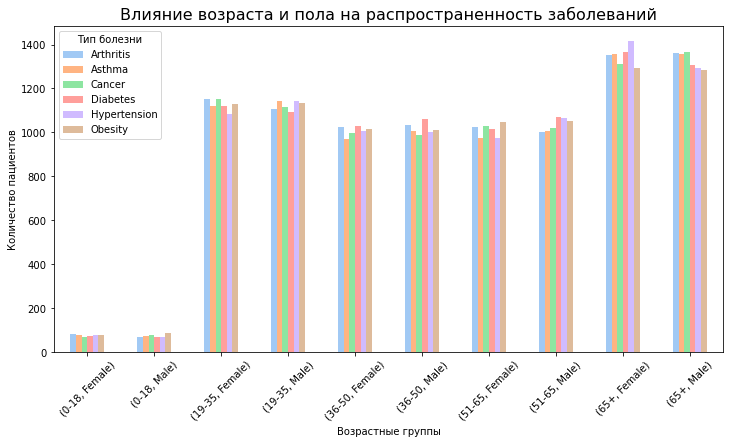

In [26]:
bins = [0, 18, 35, 50, 65, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']

age_gender_counts = data.groupby([pd.cut(data['Age'], bins=bins, labels=age_labels), 'Gender', 'Medical Condition']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
age_gender_counts.plot(kind='bar', ax=plt.gca())
plt.title('Влияние возраста и пола на распространенность заболеваний', fontsize=16)
plt.xlabel('Возрастные группы')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.legend(title='Тип болезни')
plt.show()

### 2.4.8. Визуализация количества пациентов по годам.

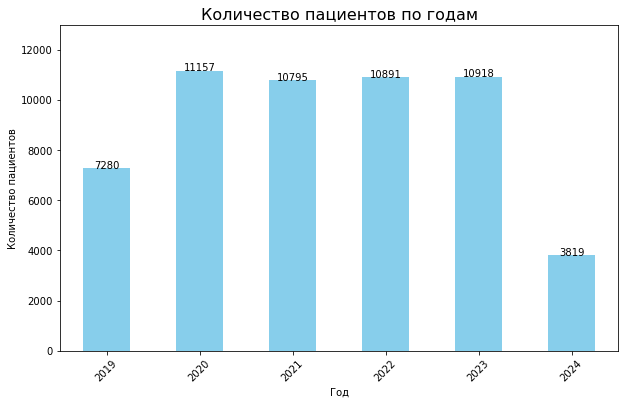

In [27]:
plt.figure(figsize=(10, 6))
counts = data['Date of Admission'].dt.year.value_counts().sort_index()
counts.plot(kind='bar', color='skyblue')

for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center') 
    
plt.xlabel('Год')
plt.ylabel('Количество пациентов')
plt.title('Количество пациентов по годам', fontsize=16)
plt.ylim(0, 13000)
plt.xticks(rotation=45)
plt.show()

### 2.4.9. Визуализация среднего времени пребывания в больнице по типу госпитализации

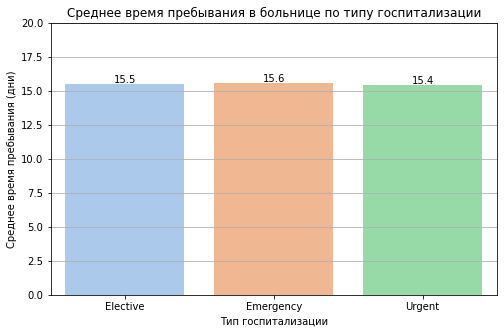

In [28]:
average_stay = data.groupby('Admission Type').apply(
    lambda x: (x['Discharge Date'] - x['Date of Admission']).dt.days.mean()
).reset_index(name='Average Stay Duration')

plt.figure(figsize=(8, 5))
sns.barplot(x='Admission Type', y='Average Stay Duration', data=average_stay, palette='pastel')

plt.title('Среднее время пребывания в больнице по типу госпитализации')
plt.xlabel('Тип госпитализации')
plt.ylabel('Среднее время пребывания (дни)')
plt.ylim(0, 20)

for index, value in enumerate(average_stay['Average Stay Duration']):
    plt.text(index, value + 0.1, f'{value:.1f}', ha='center')

plt.grid(axis='y')
plt.show()

### 2.4.10. Визуализация динамики поступления пациентов по месяцам

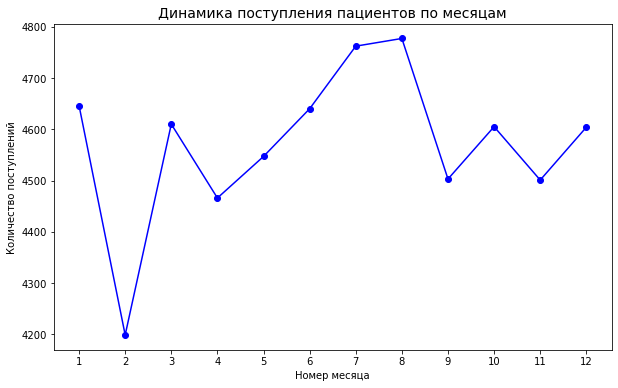

In [29]:
monthly_admissions = data['Date of Admission'].dt.month.value_counts().sort_index()
monthly_admissions_data = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

plt.figure(figsize=(10, 6))
plt.plot(monthly_admissions_data['Month'], monthly_admissions_data['Admissions'], marker='o', color='blue')
plt.title('Динамика поступления пациентов по месяцам', fontsize=14)
plt.xlabel('Номер месяца')
plt.ylabel('Количество поступлений')
plt.xticks(monthly_admissions_data['Month'])
plt.show()

### 2.4.11. Визуализация ежегодной динамики распространения заболеваний

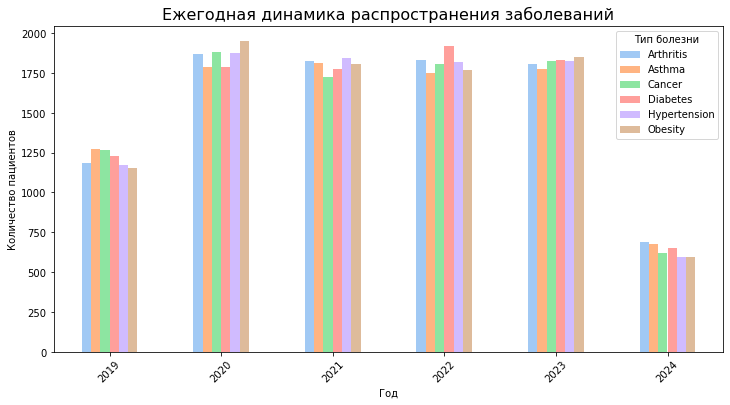

In [30]:
patients_counts = data.groupby([data['Date of Admission'].dt.year, 
                                 'Medical Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
patients_counts.plot(kind='bar', ax=plt.gca())
plt.title('Ежегодная динамика распространения заболеваний', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.legend(title='Тип болезни')
plt.show()

### 2.4.12. Визуализация влияния страховой компании на среднюю сумму счета

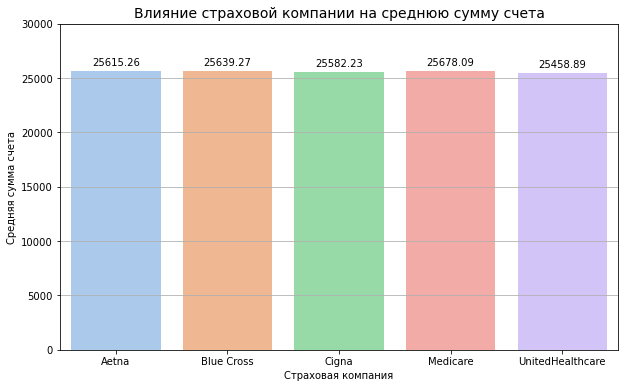

In [31]:
average_bills = data.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=average_bills, palette='pastel')

plt.title('Влияние страховой компании на среднюю сумму счета', fontsize=14)
plt.xlabel('Страховая компания')
plt.ylabel('Средняя сумма счета')
plt.ylim(0, 30000)

for index, value in enumerate(average_bills['Billing Amount']):
    plt.text(index, value + 500, f'{value:.2f}', ha='center')

plt.grid(axis='y')
plt.show()

### 2.4.13. Визуализация средней суммы счетов по страховым компаниям для разных возрастных групп

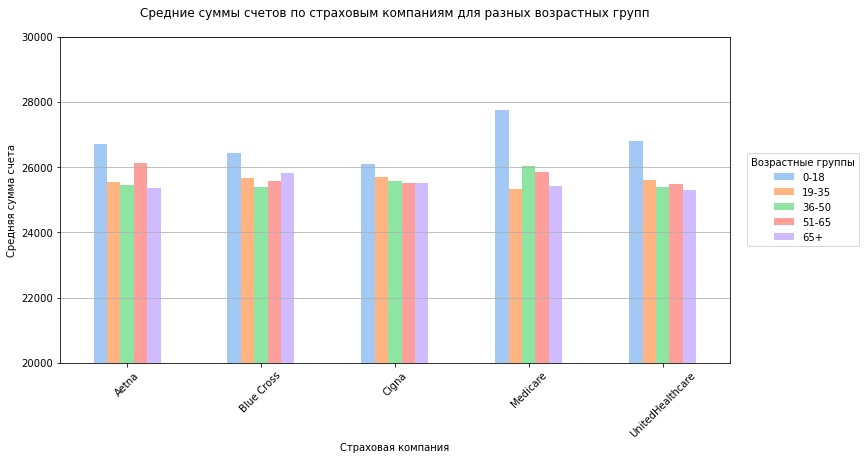

In [32]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']

average_bills = data.groupby(['Insurance Provider', pd.cut(data['Age'], bins=bins, labels=labels)]
                          )['Billing Amount'].mean().unstack()

plt.figure(figsize=(12, 6))
average_bills.plot(kind='bar', ax=plt.gca())

plt.title('Средние суммы счетов по страховым компаниям для разных возрастных групп', pad=20)
plt.xlabel('Страховая компания')
plt.ylabel('Средняя сумма счета')
plt.xticks(rotation=45)
plt.legend(title='Возрастные группы', loc='right', bbox_to_anchor=(1.2, 0.5))
plt.grid(axis='y')
plt.ylim(20000, 30000)
plt.show()

### 2.4.14. Визуализация распределения пациентов по типу госпитализации по годам

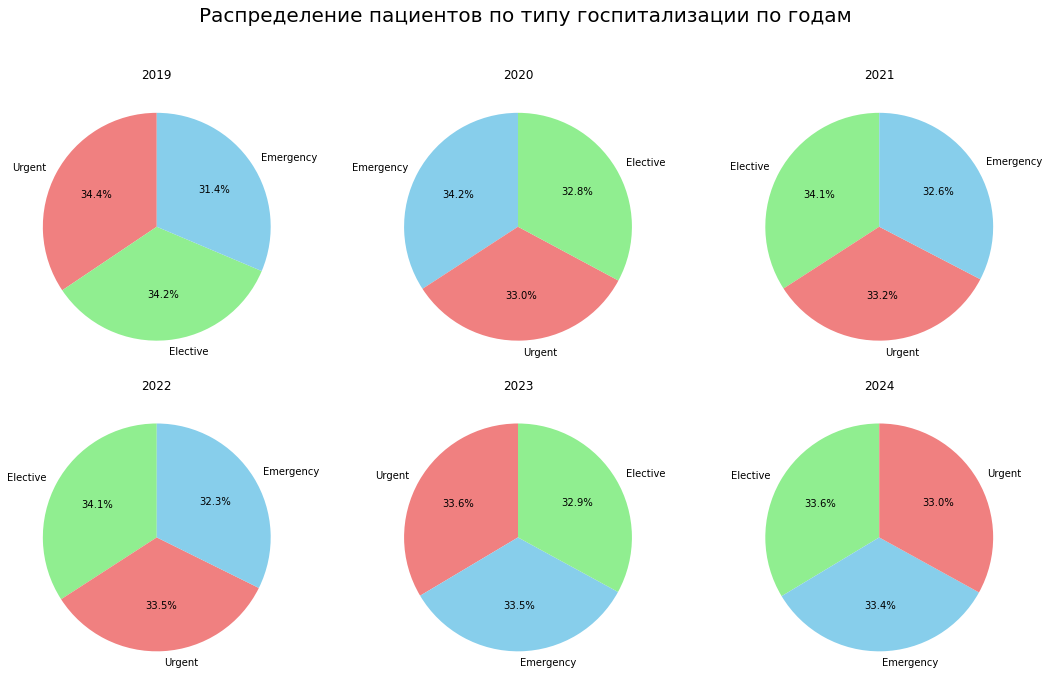

In [33]:
years = sorted(data['Date of Admission'].dt.year.unique())
n_rows = 2
n_cols = (len(years) + n_rows - 1) // n_rows
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle("Распределение пациентов по типу госпитализации по годам", fontsize=20)
colors = {
    'Urgent': 'lightcoral',
    'Emergency': 'skyblue',
    'Elective': 'lightgreen'
}

for ax, year in zip(axes, years):
    admission_counts = data[data['Date of Admission'].dt.year == year]['Admission Type'].value_counts()
    ax.pie(admission_counts, labels=admission_counts.index, autopct='%.1f%%', startangle=90,
           colors=[colors[admission_type] for admission_type in admission_counts.index])
    
    ax.set_title(year)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2.4.15. Визуализация результатов тестов по назначенным лекарственным препаратам.

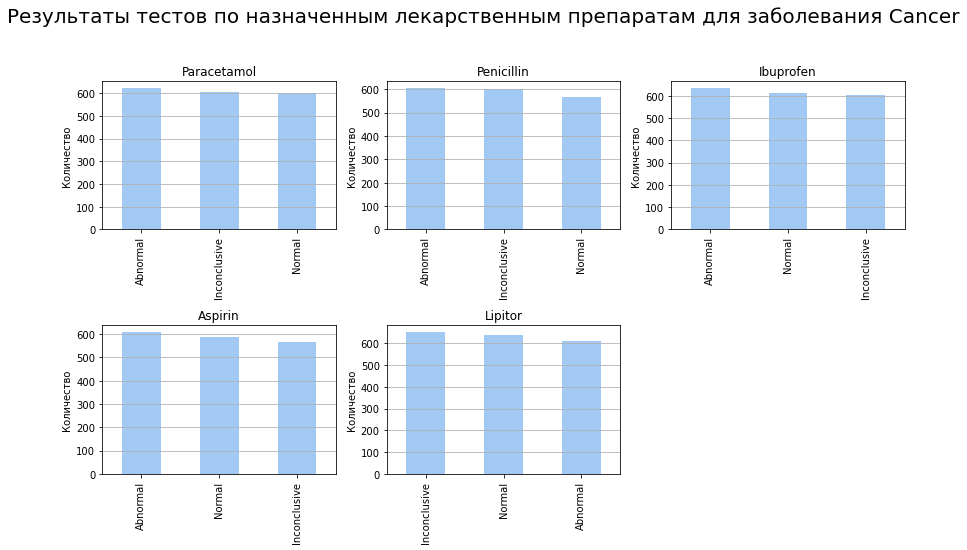

In [34]:
cancer_data = data[data['Medical Condition'] == 'Cancer']
medications = cancer_data['Medication'].unique()
n_rows = 2
n_cols = (len(medications) + n_rows - 1) // n_rows
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle("Результаты тестов по назначенным лекарственным препаратам для заболевания Cancer", fontsize=20)

for ax, medication in zip(axes, medications):
    results = cancer_data[cancer_data['Medication'] == medication]['Test Results']
    results.value_counts().plot(kind='bar', ax=ax)
    ax.set_title(medication)
    ax.set_ylabel('Количество')
    ax.grid(axis='y')

for i in range(len(medications), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()